# Data-prepping for approach to predict the bike trips

In [469]:
import seaborn as sb
import numpy as np
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import matplotlib.pyplot as plt

In [470]:
# Load the data
train_main = pd.read_csv('../data/train_main.csv')


In [471]:
train_main.head()

,date,trip_count
0,2013-08-29,742
1,2013-08-30,699
2,2013-08-31,628
3,2013-09-01,683
4,2013-09-02,652


In [472]:
# Load the stations data
stations_sf = pd.read_csv('../data/station_san_francisco.csv')
stations_mv = pd.read_csv('../data/station_mountain_view.csv')
stations_pa = pd.read_csv('../data/station_palo_alto.csv')
stations_re = pd.read_csv('../data/station_redwood_city.csv')
stations_sj = pd.read_csv('../data/station_san_jose.csv')

In [473]:
stations_sf.head()

,id,name,lat,long,dock_count,city,installation_date
0,41,Clay at Battery,37.795001,-122.399970,15,San Francisco,2013-08-19
1,42,Davis at Jackson,37.797280,-122.398436,15,San Francisco,2013-08-19
2,45,Commercial at Montgomery,37.794231,-122.402923,15,San Francisco,2013-08-19
3,46,Washington at Kearney,37.795425,-122.404767,15,San Francisco,2013-08-19
4,47,Post at Kearney,37.788975,-122.403452,19,San Francisco,2013-08-19


In [474]:
# Load the weather data
weather_sf = pd.read_csv('../data/weather_94107_SF.csv')
weather_mv = pd.read_csv('../data/weather_94041_MountainView.csv')
weather_pa = pd.read_csv('../data/weather_94301_PaloAlto.csv')
weather_re = pd.read_csv('../data/weather_94063_Redwood.csv')
weather_sj = pd.read_csv('../data/weather_95113_SanJose.csv')

In [475]:
weather_mv.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,1/1/2014,59.0,46.0,34.0,44.0,36.0,28.0,80.0,69.0,53.0,...,8.0,6.0,14.0,2.0,14.0,0.0,0.0,clear_day,348.0,94041
1,1/1/2015,54.0,43.0,32.0,28.0,24.0,16.0,64.0,45.0,26.0,...,10.0,10.0,14.0,2.0,16.0,0.0,0.0,clear_day,311.0,94041
2,1/10/2014,63.0,49.0,40.0,50.0,41.0,34.0,86.0,74.0,57.0,...,10.0,8.0,14.0,1.0,14.0,0.0,2.0,clear_day,350.0,94041
3,1/10/2015,60.0,53.0,46.0,50.0,47.0,45.0,93.0,79.0,64.0,...,7.0,5.0,8.0,2.0,8.0,0.0,2.0,clear_day,301.0,94041
4,1/11/2014,59.0,49.0,43.0,50.0,42.0,37.0,86.0,77.0,69.0,...,10.0,8.0,20.0,1.0,20.0,0.0,3.0,clear_day,261.0,94041


##### Now, we have the data, we can proceed to make our training dataset for predicting the trips for each city.

In our 'train_main' df, we have the dates, and for each dates, we have the number of trips. 

Now, for each date, we can try to label it as what kind of day it was (feature creation). 

For example, we have a day as a holiday, then we can label that day as a holiday and add it as a feature for our training data. 

Reference: https://towardsdatascience.com/holiday-calendars-with-pandas-9c01f1ee5fee

In [476]:
# Find holidays in the range of the data
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=train_main['date'].min(), end=train_main['date'].max())
holidays


DatetimeIndex(['2013-09-02', '2013-10-14', '2013-11-11', '2013-11-28',
               '2013-12-25', '2014-01-01', '2014-01-20', '2014-02-17',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13',
               '2014-11-11', '2014-11-27', '2014-12-25', '2015-01-01',
               '2015-01-19', '2015-02-16', '2015-05-25', '2015-07-03'],
              dtype='datetime64[ns]', freq=None)

In [477]:
# Find business days in the range of the data
business_days = pd.bdate_range(start=train_main['date'].min(), end=train_main['date'].max())
business_days


DatetimeIndex(['2013-08-29', '2013-08-30', '2013-09-02', '2013-09-03',
               '2013-09-04', '2013-09-05', '2013-09-06', '2013-09-09',
               '2013-09-10', '2013-09-11',
               ...
               '2015-08-18', '2015-08-19', '2015-08-20', '2015-08-21',
               '2015-08-24', '2015-08-25', '2015-08-26', '2015-08-27',
               '2015-08-28', '2015-08-31'],
              dtype='datetime64[ns]', length=523, freq='B')

In [478]:
# Datatype of holidays
type(holidays)

pandas.core.indexes.datetimes.DatetimeIndex

In [479]:
holidays = pd.to_datetime(holidays, format = '%Y/%m/%d').date

In [480]:
# Datatype of holidays
type(holidays)

numpy.ndarray

In [481]:
# Dataype of business days
type(business_days)

pandas.core.indexes.datetimes.DatetimeIndex

In [482]:
business_days = pd.to_datetime(business_days, format = '%Y/%m/%d').date

In [483]:
# Dataype of business days
type(business_days)

numpy.ndarray

In [484]:
train_main['holiday'] = train_main['date'].isin(holidays)
train_main['business_day'] = train_main['date'].isin(business_days)

In [485]:
train_main['holiday'].head()

0    False
1    False
2    False
3    False
4    False
Name: holiday, dtype: bool

In [486]:
train_main['business_day'].head()


0    False
1    False
2    False
3    False
4    False
Name: business_day, dtype: bool

In [487]:
train_main['month'] = pd.to_datetime(train_main.date).dt.month


In [488]:
train_main.head()

,date,trip_count,holiday,business_day,month
0,2013-08-29,742,False,False,8
1,2013-08-30,699,False,False,8
2,2013-08-31,628,False,False,8
3,2013-09-01,683,False,False,9
4,2013-09-02,652,False,False,9


In [489]:
# Datatype of column 'date'
type(train_main['date'][0])

str

In [490]:
# Convert column 'date' to datetime
train_main['date'] = pd.to_datetime(train_main['date'], format = '%Y/%m/%d')
# Datatype of column 'date'
type(train_main['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [491]:
# For each date in the train_main, tell if day is weekday or not
train_main['weekday'] = train_main['date'].dt.weekday < 5

In [492]:
train_main.head()

,date,trip_count,holiday,business_day,month,weekday
0,2013-08-29,742,False,False,8,True
1,2013-08-30,699,False,False,8,True
2,2013-08-31,628,False,False,8,False
3,2013-09-01,683,False,False,9,False
4,2013-09-02,652,False,False,9,True


##### We also can add the weather data to our training_data.

In [493]:
# For each city, merge weather and train_main data
train_main_sf = train_main.merge(weather_sf, on=train_main.date)
train_main_mv = train_main.merge(weather_mv, on=train_main.date)
#train_main_pa = train_main.merge(weather_pa, on=train_main.date)
train_main_re = train_main.merge(weather_re, on=train_main.date)
train_main_sj = train_main.merge(weather_sj, on=train_main.date)


Since Palo Alto had null values as stated in the weather explore notebook, we decided not to predict for Palo Alto.

In [494]:
train_main_sf.head()

,key_0,date_x,trip_count,holiday,business_day,month,weekday,date_y,max_temperature_f,mean_temperature_f,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29,2013-08-29,742,False,False,8,True,1/1/2014,56.0,49.0,...,9.0,7.0,9.0,1.0,10.0,0.0,3.0,clear_day,290.0,94107
1,2013-08-30,2013-08-30,699,False,False,8,True,1/1/2015,56.0,47.0,...,10.0,10.0,23.0,8.0,28.0,0.0,1.0,clear_day,40.0,94107
2,2013-08-31,2013-08-31,628,False,False,8,False,1/10/2014,60.0,54.0,...,9.0,6.0,15.0,6.0,17.0,0.0,4.0,clear_day,310.0,94107
3,2013-09-01,2013-09-01,683,False,False,9,False,1/10/2015,60.0,54.0,...,7.0,4.0,8.0,3.0,10.0,0.0,6.0,fog,280.0,94107
4,2013-09-02,2013-09-02,652,False,False,9,True,1/11/2014,58.0,52.0,...,10.0,6.0,18.0,6.0,22.0,0.0,4.0,clear_day,281.0,94107


In [495]:
# Sum trip count for each unique events
# train_main_sf.groupby('events').sum()


In [496]:

# # Plot only trip count for each unique events
# train_main_sf.groupby('events').sum()['trip_count'].plot(kind='bar')
# # train_main_sf.groupby('events').sum().plot(kind='bar')



In [497]:
train_main_re.head()

,key_0,date_x,trip_count,holiday,business_day,month,weekday,date_y,max_temperature_f,mean_temperature_f,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29,2013-08-29,742,False,False,8,True,1/1/2014,55.0,47.0,...,8.0,4.0,6.0,0.0,6.0,0.0,1.0,clear_day,54.0,94063
1,2013-08-30,2013-08-30,699,False,False,8,True,1/1/2015,55.0,46.0,...,10.0,10.0,8.0,2.0,8.0,0.0,1.0,clear_day,314.0,94063
2,2013-08-31,2013-08-31,628,False,False,8,False,1/10/2014,59.0,52.0,...,10.0,7.0,7.0,2.0,7.0,0.0,2.0,clear_day,342.0,94063
3,2013-09-01,2013-09-01,683,False,False,9,False,1/10/2015,59.0,54.0,...,9.0,3.0,7.0,3.0,7.0,0.0,3.0,clear_day,325.0,94063
4,2013-09-02,2013-09-02,652,False,False,9,True,1/11/2014,57.0,50.0,...,9.0,6.0,8.0,2.0,8.0,0.0,4.0,clear_day,269.0,94063


For some reason, we see that we have attributes 'key_0' and 'date_y'. 

'key_0' is simply a duplicate of 'date_x' and 'date_y' seems to be picked up from trips.csv. So we will discard them.

In [498]:
# Discard the 'key_0' column and 'date_y' column
train_main_sf.drop(['key_0', 'date_y'], axis=1, inplace=True)
train_main_mv.drop(['key_0', 'date_y'], axis=1, inplace=True)
train_main_re.drop(['key_0', 'date_y'], axis=1, inplace=True)
train_main_sj.drop(['key_0', 'date_y'], axis=1, inplace=True)

In [499]:
train_main_sf.head()

,date_x,trip_count,holiday,business_day,month,weekday,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29,742,False,False,8,True,56.0,49.0,41.0,45.0,...,9.0,7.0,9.0,1.0,10.0,0.0,3.0,clear_day,290.0,94107
1,2013-08-30,699,False,False,8,True,56.0,47.0,38.0,27.0,...,10.0,10.0,23.0,8.0,28.0,0.0,1.0,clear_day,40.0,94107
2,2013-08-31,628,False,False,8,False,60.0,54.0,48.0,48.0,...,9.0,6.0,15.0,6.0,17.0,0.0,4.0,clear_day,310.0,94107
3,2013-09-01,683,False,False,9,False,60.0,54.0,47.0,52.0,...,7.0,4.0,8.0,3.0,10.0,0.0,6.0,fog,280.0,94107
4,2013-09-02,652,False,False,9,True,58.0,52.0,46.0,51.0,...,10.0,6.0,18.0,6.0,22.0,0.0,4.0,clear_day,281.0,94107


In [500]:
train_main_re.head()

,date_x,trip_count,holiday,business_day,month,weekday,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29,742,False,False,8,True,55.0,47.0,39.0,45.0,...,8.0,4.0,6.0,0.0,6.0,0.0,1.0,clear_day,54.0,94063
1,2013-08-30,699,False,False,8,True,55.0,46.0,37.0,32.0,...,10.0,10.0,8.0,2.0,8.0,0.0,1.0,clear_day,314.0,94063
2,2013-08-31,628,False,False,8,False,59.0,52.0,44.0,50.0,...,10.0,7.0,7.0,2.0,7.0,0.0,2.0,clear_day,342.0,94063
3,2013-09-01,683,False,False,9,False,59.0,54.0,48.0,54.0,...,9.0,3.0,7.0,3.0,7.0,0.0,3.0,clear_day,325.0,94063
4,2013-09-02,652,False,False,9,True,57.0,50.0,44.0,50.0,...,9.0,6.0,8.0,2.0,8.0,0.0,4.0,clear_day,269.0,94063


We will also rename the date_x column to 'date' as intended before

In [501]:
# Rename the 'date_x' column to 'date'
train_main_sf.rename(columns={'date_x': 'date'}, inplace=True)
train_main_mv.rename(columns={'date_x': 'date'}, inplace=True)
train_main_re.rename(columns={'date_x': 'date'}, inplace=True)
train_main_sj.rename(columns={'date_x': 'date'}, inplace=True)


In [502]:
train_main_sf.head()

,date,trip_count,holiday,business_day,month,weekday,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29,742,False,False,8,True,56.0,49.0,41.0,45.0,...,9.0,7.0,9.0,1.0,10.0,0.0,3.0,clear_day,290.0,94107
1,2013-08-30,699,False,False,8,True,56.0,47.0,38.0,27.0,...,10.0,10.0,23.0,8.0,28.0,0.0,1.0,clear_day,40.0,94107
2,2013-08-31,628,False,False,8,False,60.0,54.0,48.0,48.0,...,9.0,6.0,15.0,6.0,17.0,0.0,4.0,clear_day,310.0,94107
3,2013-09-01,683,False,False,9,False,60.0,54.0,47.0,52.0,...,7.0,4.0,8.0,3.0,10.0,0.0,6.0,fog,280.0,94107
4,2013-09-02,652,False,False,9,True,58.0,52.0,46.0,51.0,...,10.0,6.0,18.0,6.0,22.0,0.0,4.0,clear_day,281.0,94107


In [528]:
train_main_re.head()

# 

,holiday,business_day,month,weekday,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,...,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,zip_code,fog,fog_rain,rain
0,0,0,8,1,55.0,47.0,39.0,45.0,38.0,36.0,...,6.0,0.0,6.0,0.0,1.0,54.0,94063,0,0,0
1,0,0,8,1,55.0,46.0,37.0,32.0,26.0,18.0,...,8.0,2.0,8.0,0.0,1.0,314.0,94063,0,0,0
2,0,0,8,0,59.0,52.0,44.0,50.0,44.0,39.0,...,7.0,2.0,7.0,0.0,2.0,342.0,94063,0,0,0
3,0,0,9,0,59.0,54.0,48.0,54.0,48.0,46.0,...,7.0,3.0,7.0,0.0,3.0,325.0,94063,0,0,0
4,0,0,9,1,57.0,50.0,44.0,50.0,45.0,41.0,...,8.0,2.0,8.0,0.0,4.0,269.0,94063,0,0,0


<AxesSubplot:xlabel='month'>

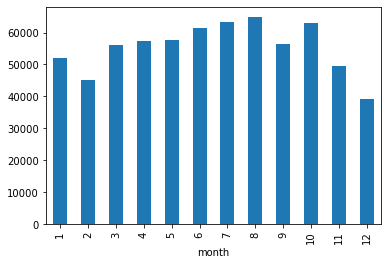

In [503]:
# # Plot the trip count distribution for months
# train_main_sf.groupby('month').sum()['trip_count'].plot(kind='bar')


In [504]:
# datatype for each column
train_main_sf.dtypes

date                              datetime64[ns]
trip_count                                 int64
holiday                                     bool
business_day                                bool
month                                      int64
weekday                                     bool
max_temperature_f                        float64
mean_temperature_f                       float64
min_temperature_f                        float64
max_dew_point_f                          float64
mean_dew_point_f                         float64
min_dew_point_f                          float64
max_humidity                             float64
mean_humidity                            float64
min_humidity                             float64
max_sea_level_pressure_inches            float64
mean_sea_level_pressure_inches           float64
min_sea_level_pressure_inches            float64
max_visibility_miles                     float64
mean_visibility_miles                    float64
min_visibility_miles

In [505]:
# Count the null values in each column
train_main_sf.isnull().sum()

date                              0
trip_count                        0
holiday                           0
business_day                      0
month                             0
weekday                           0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees            

##### Remember that we also had 'stations' file from which we can add more features to our training dataset.

In [506]:
train_main_mv.isnull().sum()

date                              0
trip_count                        0
holiday                           0
business_day                      0
month                             0
weekday                           0
max_temperature_f                 3
mean_temperature_f                3
min_temperature_f                 3
max_dew_point_f                   3
mean_dew_point_f                  3
min_dew_point_f                   3
max_humidity                      3
mean_humidity                     3
min_humidity                      3
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees            

Since we have checked before, all the NaN values are very small in number. So we are simply going to fill them in with 0's

In [507]:
# Fill in null values with 0 in dataframes
train_main_sf.fillna(0, inplace=True)
train_main_mv.fillna(0, inplace=True)
train_main_re.fillna(0, inplace=True)
train_main_sj.fillna(0, inplace=True)


In [508]:
# Convert holiday, business_day and weekday columns to int
train_main_sf['holiday'] = train_main_sf['holiday'].astype(int)
train_main_sf['business_day'] = train_main_sf['business_day'].astype(int)
train_main_sf['weekday'] = train_main_sf['weekday'].astype(int)

train_main_mv['holiday'] = train_main_mv['holiday'].astype(int)
train_main_mv['business_day'] = train_main_mv['business_day'].astype(int)
train_main_mv['weekday'] = train_main_mv['weekday'].astype(int)

train_main_re['holiday'] = train_main_re['holiday'].astype(int)
train_main_re['business_day'] = train_main_re['business_day'].astype(int)
train_main_re['weekday'] = train_main_re['weekday'].astype(int)

train_main_sj['holiday'] = train_main_sj['holiday'].astype(int)
train_main_sj['business_day'] = train_main_sj['business_day'].astype(int)
train_main_sj['weekday'] = train_main_sj['weekday'].astype(int)



In [509]:
train_main_sf.head()
train_main_sf.dtypes

date                              datetime64[ns]
trip_count                                 int64
holiday                                    int32
business_day                               int32
month                                      int64
weekday                                    int32
max_temperature_f                        float64
mean_temperature_f                       float64
min_temperature_f                        float64
max_dew_point_f                          float64
mean_dew_point_f                         float64
min_dew_point_f                          float64
max_humidity                             float64
mean_humidity                            float64
min_humidity                             float64
max_sea_level_pressure_inches            float64
mean_sea_level_pressure_inches           float64
min_sea_level_pressure_inches            float64
max_visibility_miles                     float64
mean_visibility_miles                    float64
min_visibility_miles

In [510]:
# Create labels using the 'trip_count' column for each city
labels_sf = train_main_sf['trip_count']
labels_mv = train_main_mv['trip_count']
labels_re = train_main_re['trip_count']
labels_sj = train_main_sj['trip_count']


In [511]:
labels_sf.shape
labels_sf.head()

0    742
1    699
2    628
3    683
4    652
Name: trip_count, dtype: int64

In [512]:
# Drop the 'trip_count' and 'date' column from the dataframes
train_main_sf.drop(['trip_count', 'date'], axis=1, inplace=True)
train_main_mv.drop(['trip_count', 'date'], axis=1, inplace=True)
train_main_re.drop(['trip_count', 'date'], axis=1, inplace=True)
train_main_sj.drop(['trip_count', 'date'], axis=1, inplace=True)

In [513]:
train_main_re.head()

,holiday,business_day,month,weekday,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,0,0,8,1,55.0,47.0,39.0,45.0,38.0,36.0,...,8.0,4.0,6.0,0.0,6.0,0.0,1.0,clear_day,54.0,94063
1,0,0,8,1,55.0,46.0,37.0,32.0,26.0,18.0,...,10.0,10.0,8.0,2.0,8.0,0.0,1.0,clear_day,314.0,94063
2,0,0,8,0,59.0,52.0,44.0,50.0,44.0,39.0,...,10.0,7.0,7.0,2.0,7.0,0.0,2.0,clear_day,342.0,94063
3,0,0,9,0,59.0,54.0,48.0,54.0,48.0,46.0,...,9.0,3.0,7.0,3.0,7.0,0.0,3.0,clear_day,325.0,94063
4,0,0,9,1,57.0,50.0,44.0,50.0,45.0,41.0,...,9.0,6.0,8.0,2.0,8.0,0.0,4.0,clear_day,269.0,94063


When we train our model, it will not be possible if the datatypes are not either int or float. So I will try to convert the events (simply what the day was like e.g. clear, rainy etc.) to int.

In [514]:
events_sf = pd.get_dummies(train_main_sf.events, drop_first = True)
events_mv = pd.get_dummies(train_main_mv.events, drop_first = True)
events_re = pd.get_dummies(train_main_re.events, drop_first = True)
events_sj = pd.get_dummies(train_main_sj.events, drop_first = True)


In [515]:
# For each city df, merge the events df with the main df
train_main_sf = train_main_sf.merge(events_sf, left_index = True, right_index = True)
train_main_mv = train_main_mv.merge(events_mv, left_index = True, right_index = True)
train_main_re = train_main_re.merge(events_re, left_index = True, right_index = True)
train_main_sj = train_main_sj.merge(events_sj, left_index = True, right_index = True)

In [516]:
train_main_sf.head()

,holiday,business_day,month,weekday,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,...,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,fog,fog_rain,rain,rain_thunderstorm
0,0,0,8,1,56.0,49.0,41.0,45.0,40.0,36.0,...,10.0,0.0,3.0,clear_day,290.0,94107,0,0,0,0
1,0,0,8,1,56.0,47.0,38.0,27.0,20.0,14.0,...,28.0,0.0,1.0,clear_day,40.0,94107,0,0,0,0
2,0,0,8,0,60.0,54.0,48.0,48.0,46.0,43.0,...,17.0,0.0,4.0,clear_day,310.0,94107,0,0,0,0
3,0,0,9,0,60.0,54.0,47.0,52.0,49.0,45.0,...,10.0,0.0,6.0,fog,280.0,94107,1,0,0,0
4,0,0,9,1,58.0,52.0,46.0,51.0,46.0,42.0,...,22.0,0.0,4.0,clear_day,281.0,94107,0,0,0,0


In [517]:
# datatype for each column
train_main_sf.dtypes

holiday                             int32
business_day                        int32
month                               int64
weekday                             int32
max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    float64
min_sea_level_pressure_inches     float64
max_visibility_miles              float64
mean_visibility_miles             float64
min_visibility_miles              float64
max_wind_Speed_mph                float64
mean_wind_speed_mph               float64
max_gust_speed_mph                float64
precipitation_inches              float64
cloud_cover                       

In [518]:
train_main_mv.head()

,holiday,business_day,month,weekday,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,...,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,fog,fog_rain,rain
0,0,0,8,1,59.0,46.0,34.0,44.0,36.0,28.0,...,2.0,14.0,0.0,0.0,clear_day,348.0,94041,0,0,0
1,0,0,8,1,54.0,43.0,32.0,28.0,24.0,16.0,...,2.0,16.0,0.0,0.0,clear_day,311.0,94041,0,0,0
2,0,0,8,0,63.0,49.0,40.0,50.0,41.0,34.0,...,1.0,14.0,0.0,2.0,clear_day,350.0,94041,0,0,0
3,0,0,9,0,60.0,53.0,46.0,50.0,47.0,45.0,...,2.0,8.0,0.0,2.0,clear_day,301.0,94041,0,0,0
4,0,0,9,1,59.0,49.0,43.0,50.0,42.0,37.0,...,1.0,20.0,0.0,3.0,clear_day,261.0,94041,0,0,0


In [519]:
# For each dataframe, drop 'events' column
train_main_sf.drop(['events'], axis=1, inplace=True)
train_main_mv.drop(['events'], axis=1, inplace=True)
train_main_re.drop(['events'], axis=1, inplace=True)
train_main_sj.drop(['events'], axis=1, inplace=True)


In [520]:
train_main_sf.head()

,holiday,business_day,month,weekday,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,...,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,zip_code,fog,fog_rain,rain,rain_thunderstorm
0,0,0,8,1,56.0,49.0,41.0,45.0,40.0,36.0,...,1.0,10.0,0.0,3.0,290.0,94107,0,0,0,0
1,0,0,8,1,56.0,47.0,38.0,27.0,20.0,14.0,...,8.0,28.0,0.0,1.0,40.0,94107,0,0,0,0
2,0,0,8,0,60.0,54.0,48.0,48.0,46.0,43.0,...,6.0,17.0,0.0,4.0,310.0,94107,0,0,0,0
3,0,0,9,0,60.0,54.0,47.0,52.0,49.0,45.0,...,3.0,10.0,0.0,6.0,280.0,94107,1,0,0,0
4,0,0,9,1,58.0,52.0,46.0,51.0,46.0,42.0,...,6.0,22.0,0.0,4.0,281.0,94107,0,0,0,0


In [521]:
# Write each model to a csv file
train_main_sf.to_csv('../data/prepped/train_main_sf.csv', index=False)
train_main_mv.to_csv('../data/prepped/train_main_mv.csv', index=False)
train_main_re.to_csv('../data/prepped/train_main_re.csv', index=False)
train_main_sj.to_csv('../data/prepped/train_main_sj.csv', index=False)

In [522]:
# Write each label to a csv file
labels_sf.to_csv('../data/prepped/labels_sf.csv', index=False)
labels_mv.to_csv('../data/prepped/labels_mv.csv', index=False)
labels_re.to_csv('../data/prepped/labels_re.csv', index=False)
labels_sj.to_csv('../data/prepped/labels_sj.csv', index=False)


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

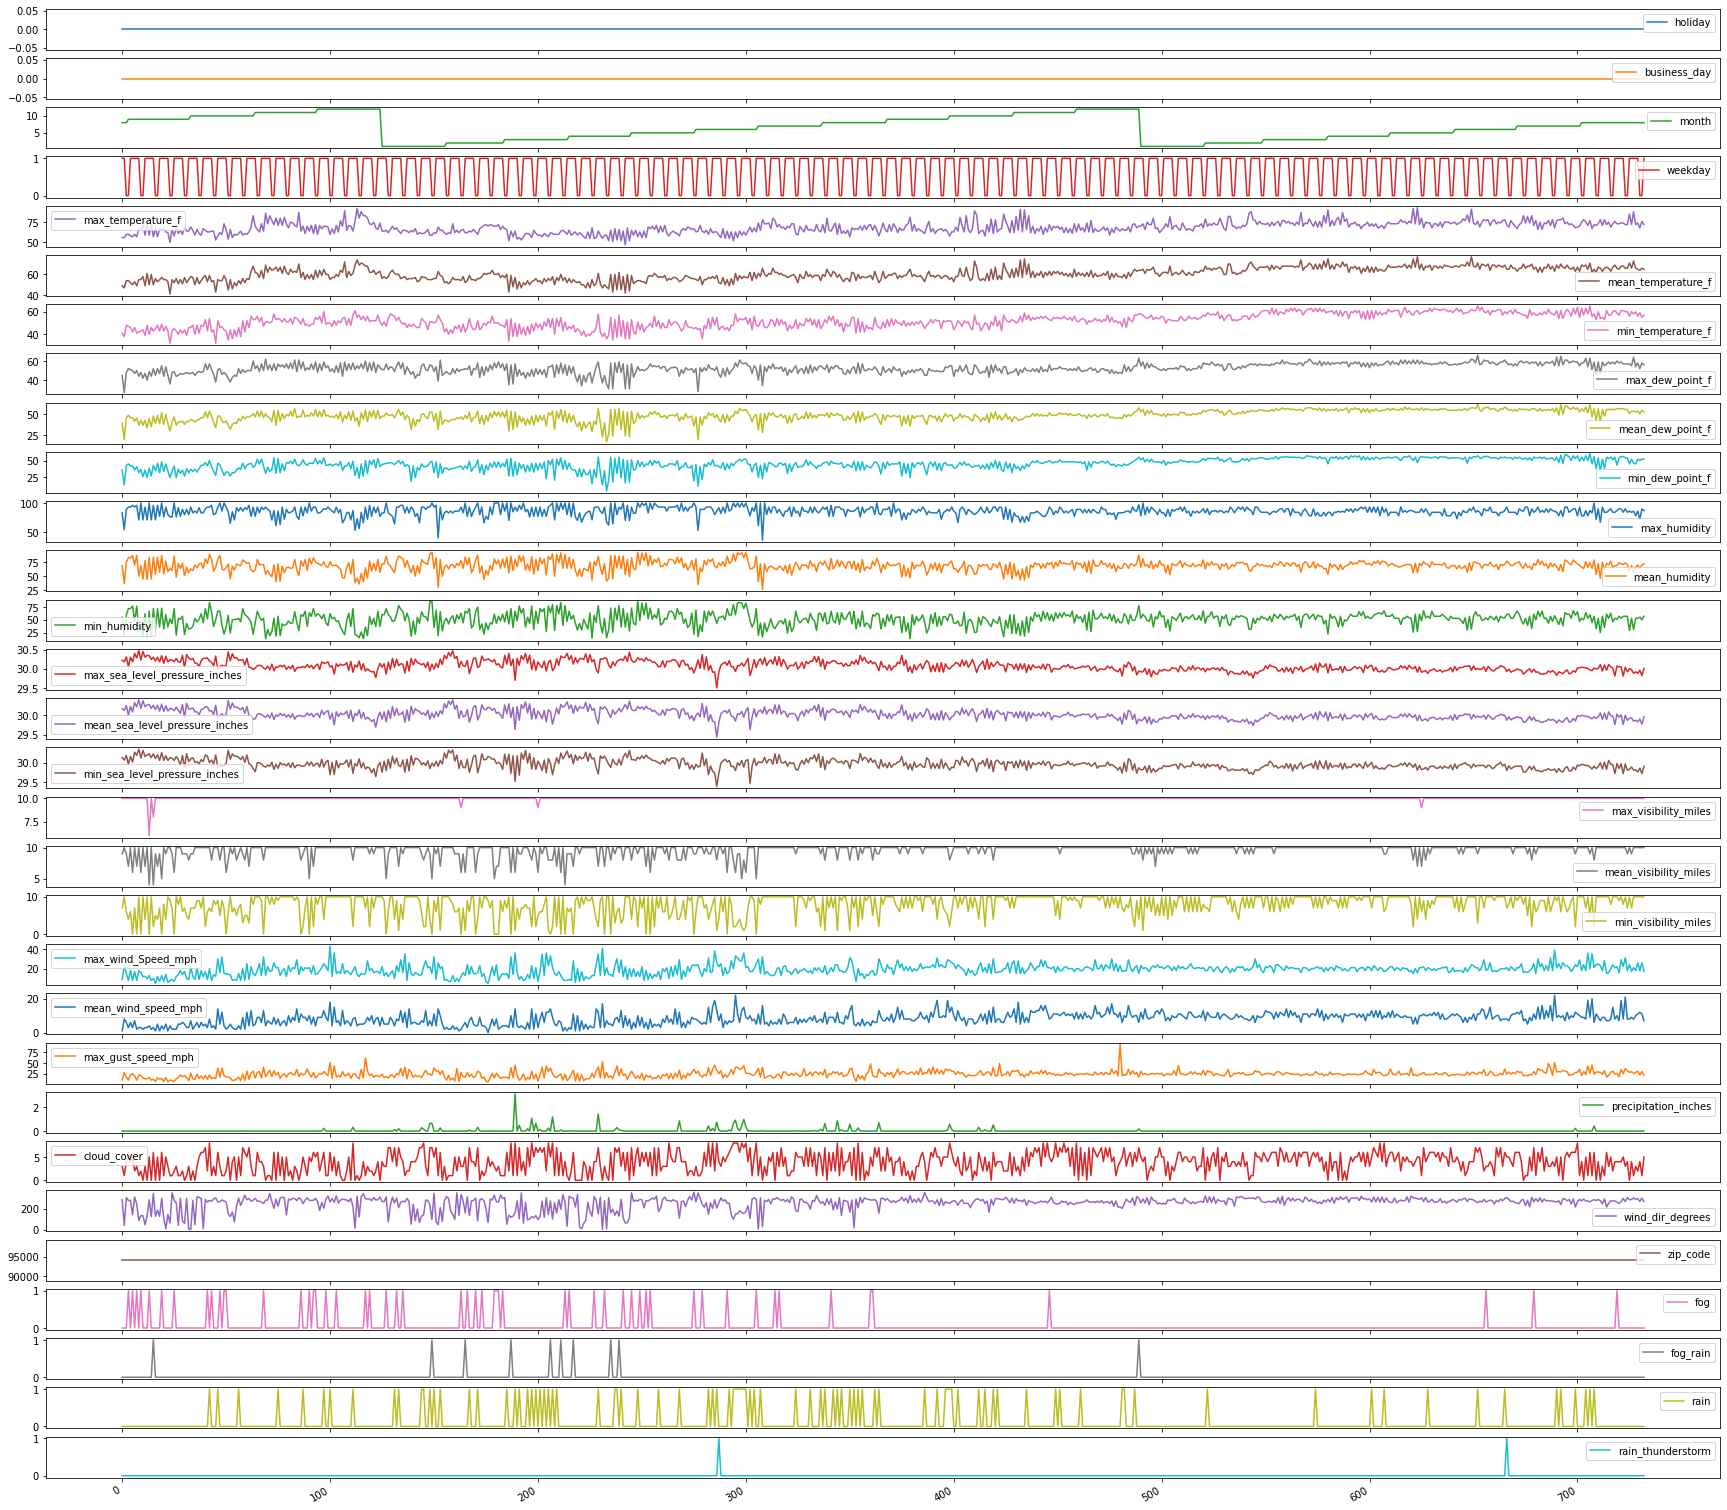

In [527]:
# For training set for each city, plot subplots
train_main_sf.plot(subplots=True, figsize=(30, 30))


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

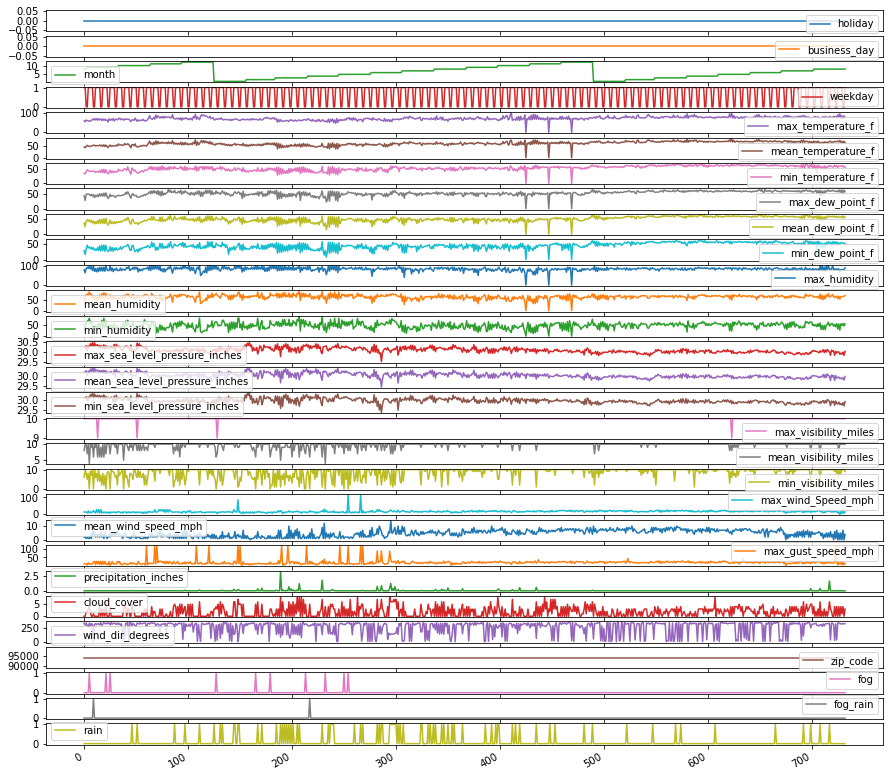

In [524]:
train_main_mv.plot(subplots=True, figsize=(15, 15))


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

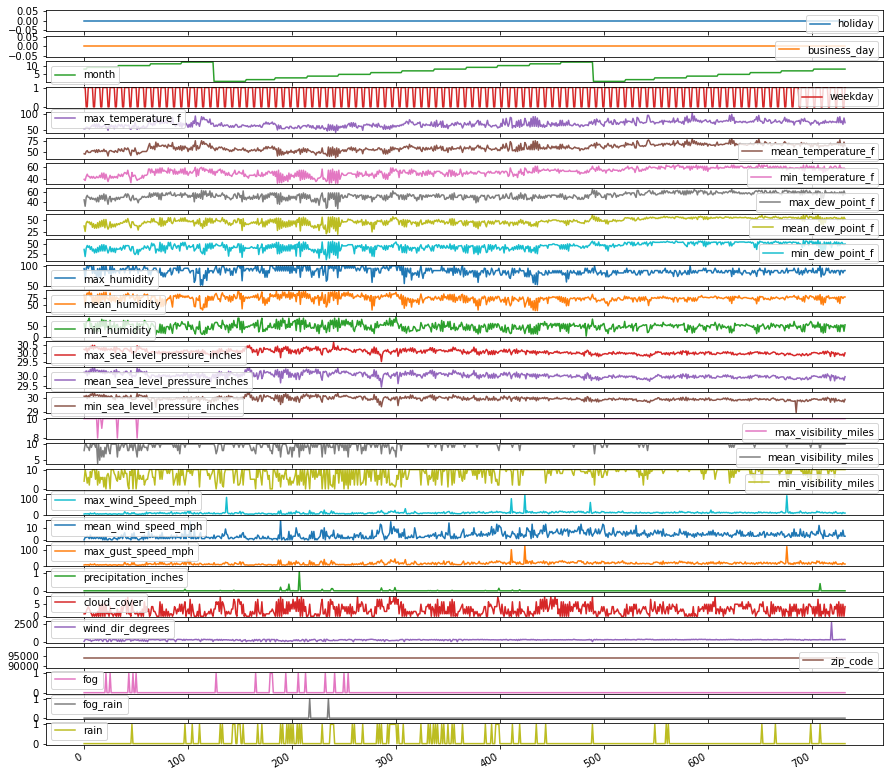

In [525]:
train_main_re.plot(subplots=True, figsize=(15, 15))


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

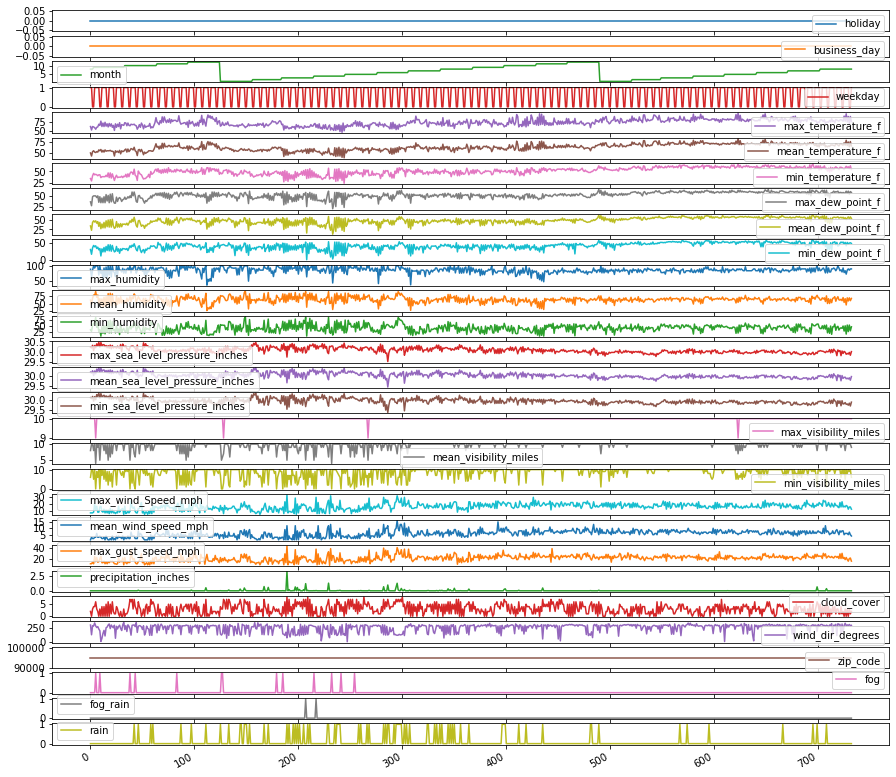

In [526]:
train_main_sj.plot(subplots=True, figsize=(15, 15))


In [529]:
import pickle
model_new = pickle.load(open('model/xgbr_mv.pkl', 'rb'))
model_new

GradientBoostingRegressor(n_estimators=50, random_state=42)

In [530]:
test_sample = np.array([0.0000e+00, 0.0000e+00, 6.0000e+00, 1.0000e+00, 7.7000e+01,
       6.9000e+01, 6.1000e+01, 6.1000e+01, 6.0000e+01, 5.8000e+01,
       9.0000e+01, 7.5000e+01, 6.0000e+01, 2.9930e+01, 2.9890e+01,
       2.9830e+01, 1.0000e+01, 1.0000e+01, 8.0000e+00, 2.2000e+01,
       5.0000e+00, 2.5000e+01, 1.0000e-02, 1.0000e+00, 3.5700e+02,
       9.4041e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [531]:
model_new.predict([test_sample])

array([248.11393035])